# Part 0: Set-up

In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
pip install igviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Econ211_Zhe_Niu/main/data/data_literature.csv")
df

Title  \
0  Explainable Artificial Intelligence (XAI): Con...   
1  A survey of methods for explaining black box m...   
2     Are Large Language Models Post Hoc Explainers?   
3  Pre-train, prompt, and predict: A systematic s...   
4  Openxai: Towards a transparent evaluation of m...   
5  Sparks of artificial general intelligence: Ear...   

                                            Abstract  
0  In the last few years, Artificial Intelligence...  
1  In recent years, many accurate decision suppor...  
2  Large Language Models (LLMs) are increasingly ...  
3  This article surveys and organizes research wo...  
4  While several types of post hoc explanation me...  
5  Artificial intelligence (AI) researchers have ...

# Part I The World Cloud

## 1.1. Title

In [5]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Explainable Artificial Intelligence (XAI): Concepts, taxonomies, opportunities and challenges toward responsible AI,A survey of methods for explaining black box models,Are Large Language Models Post Hoc Explainers?,Pre-train, prompt, and predict: A systematic survey of prompting methods in natural language processing,Openxai: Towards a transparent evaluation of model explanations,Sparks of artificial general intelligence: Early experiments with gpt-4'

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

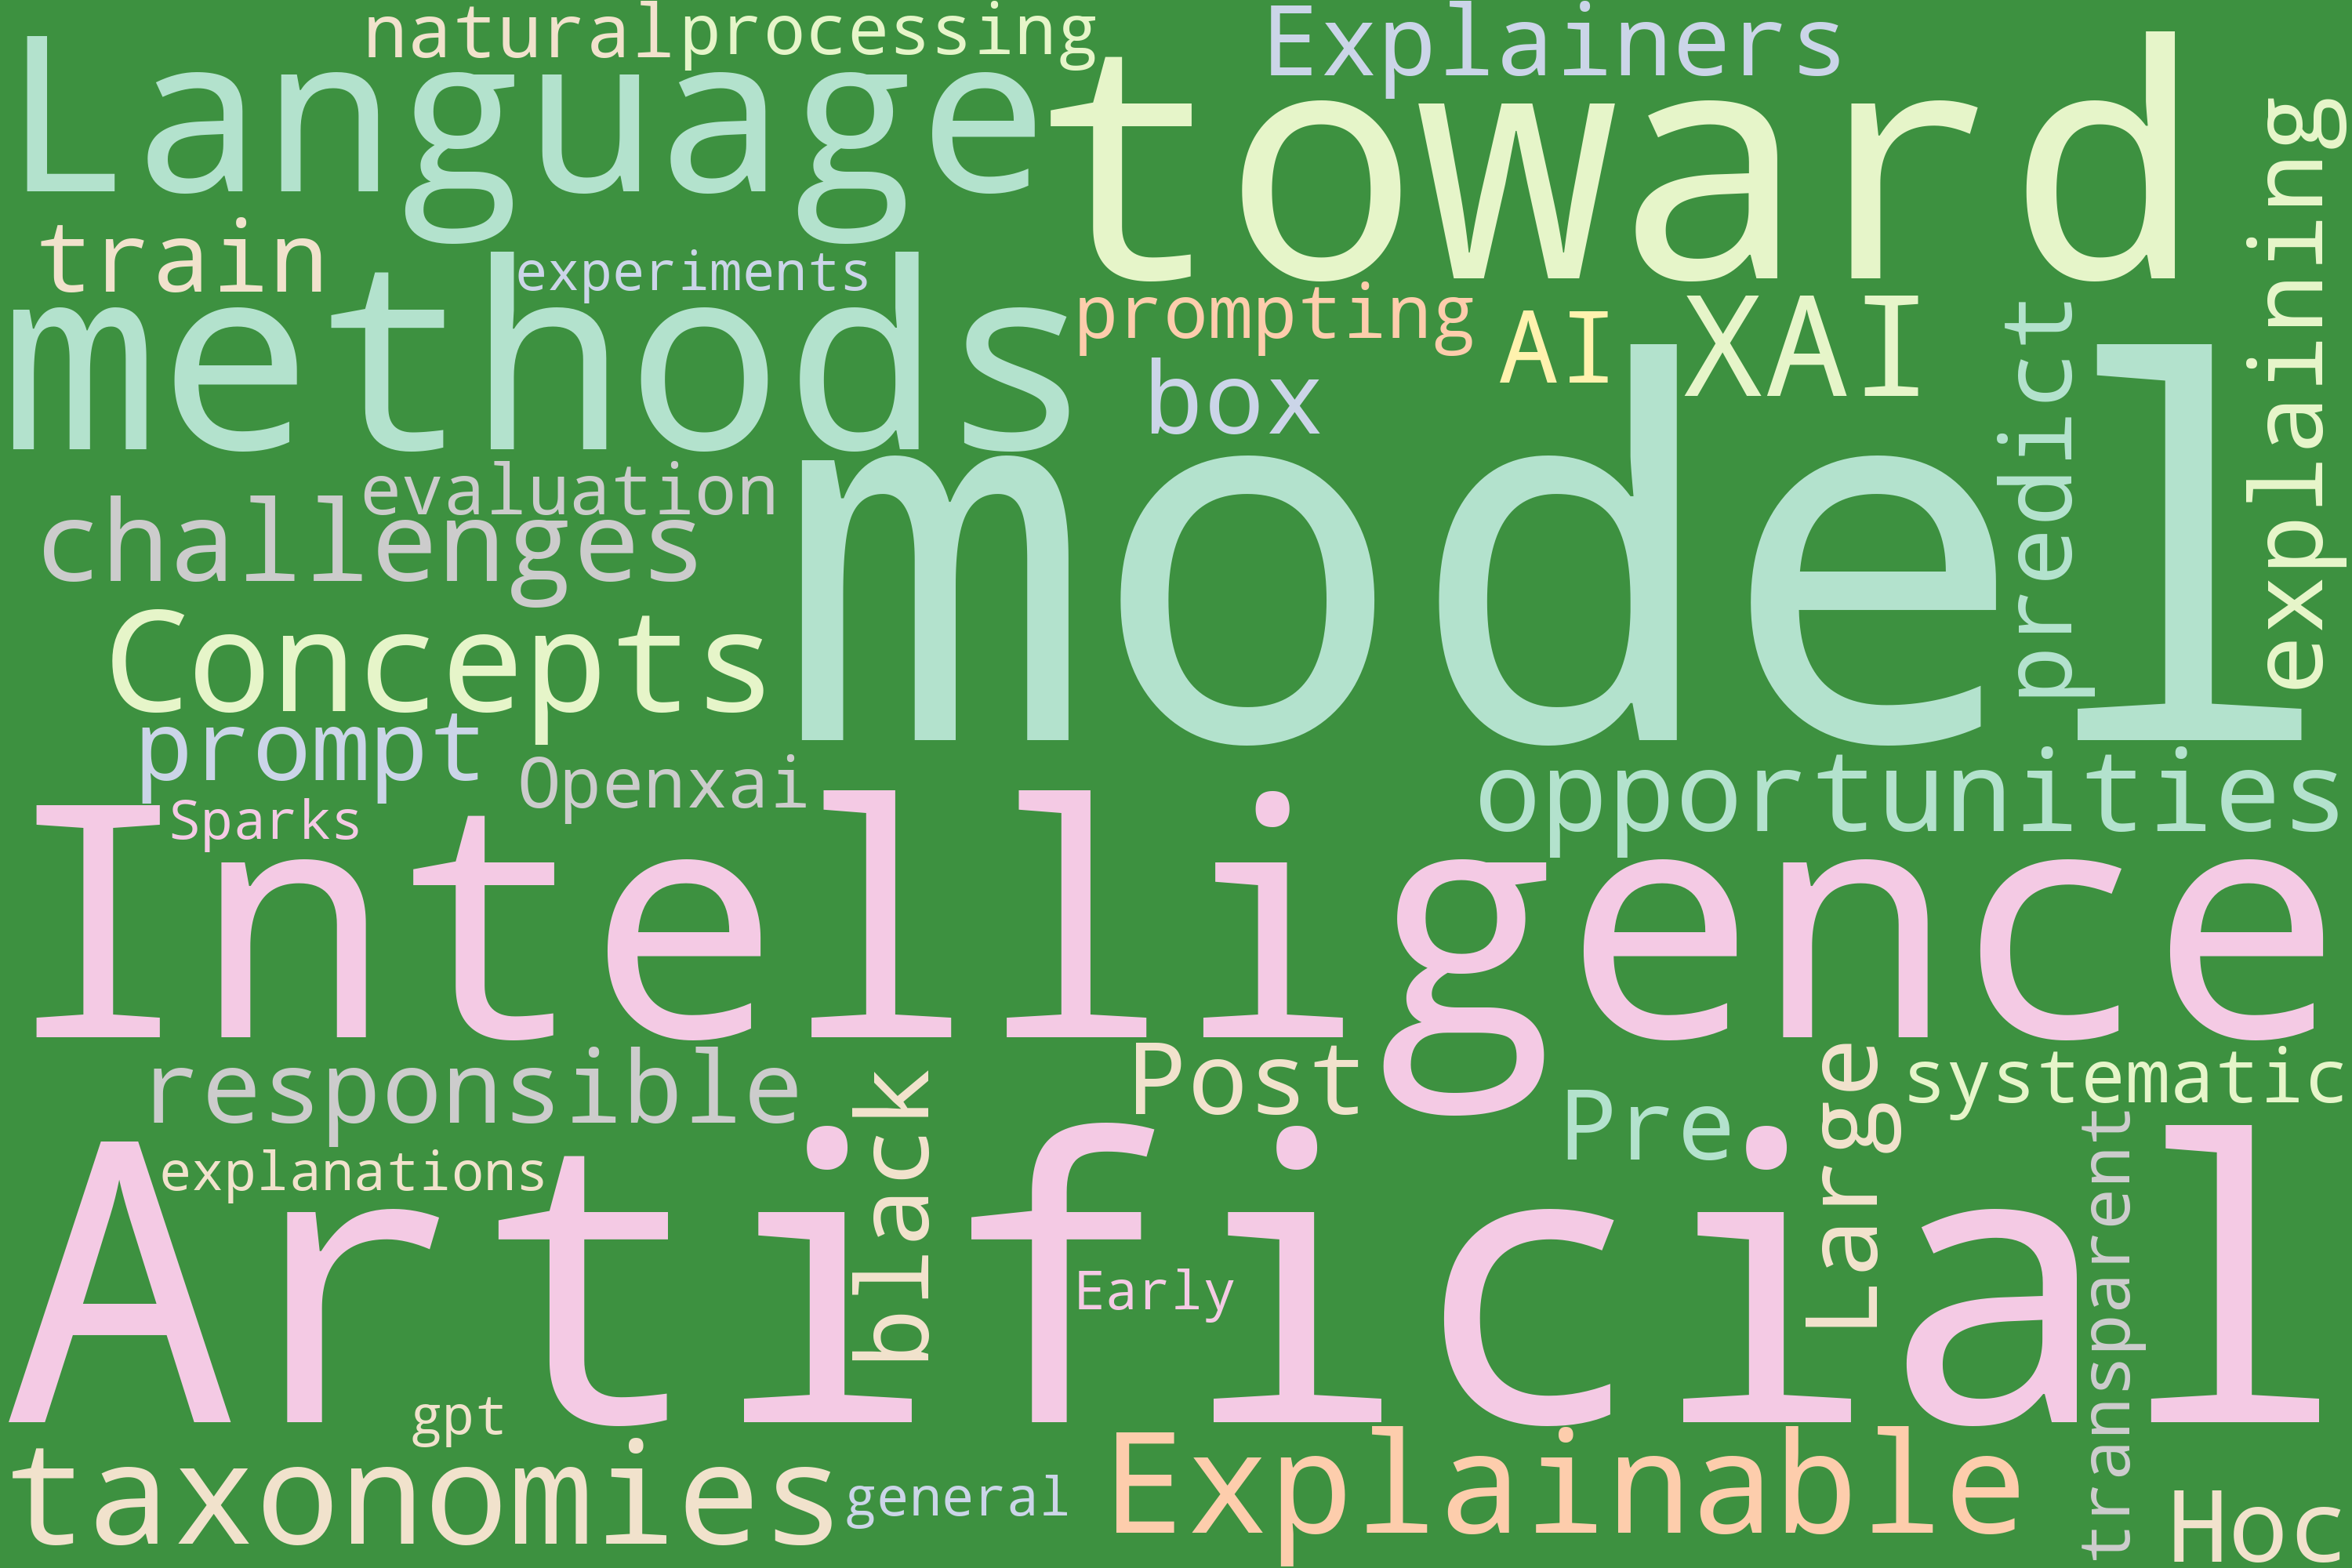

In [9]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

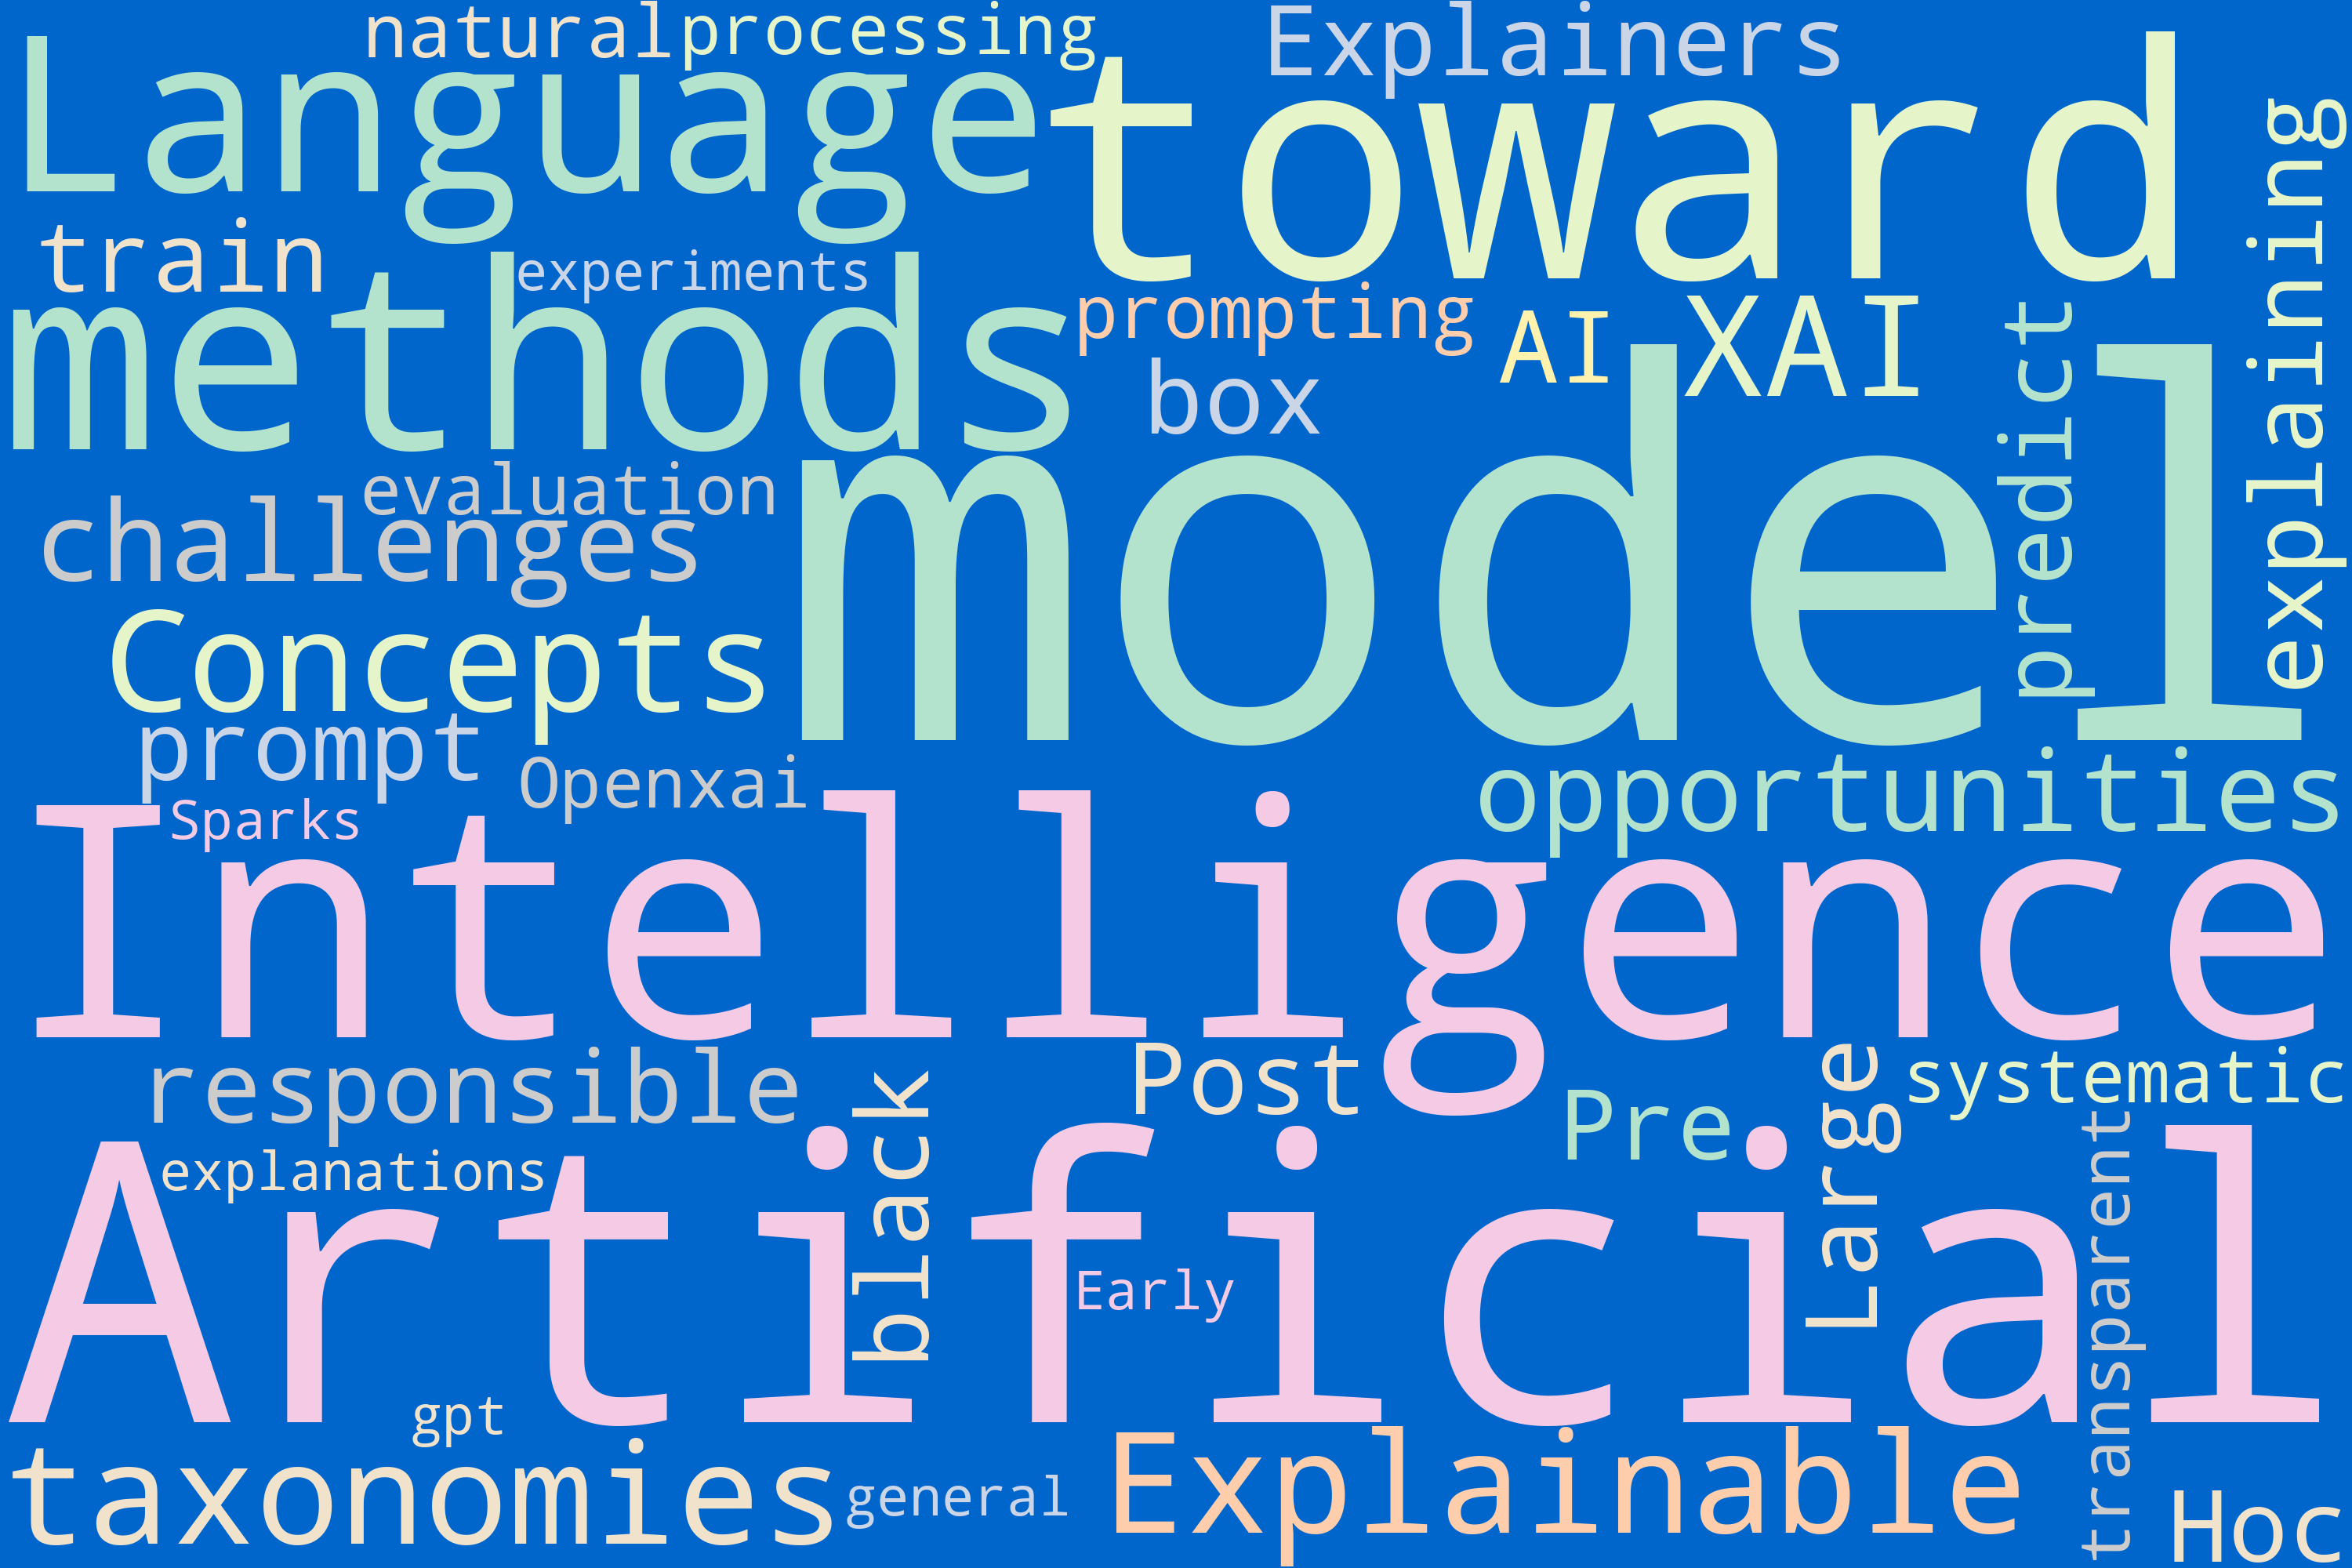

In [10]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [11]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"In the last few years, Artificial Intelligence (AI) has achieved a notable momentum that, if harnessed appropriately, may deliver the best of expectations over many application sectors across the field. For this to occur shortly in Machine Learning, the entire community stands in front of the barrier of explainability, an inherent problem of the latest techniques brought by sub-symbolism (e.g. ensembles or Deep Neural Networks) that were not present in the last hype of AI (namely, expert systems and rule based models). Paradigms underlying this problem fall within the so-called eXplainable AI (XAI) field, which is widely acknowledged as a crucial feature for the practical deployment of AI models. The overview presented in this article examines the existing literature and contributions already done in the field of XAI, including a prospect toward what is yet to be reached. For this purpose we summarize previous efforts made to define explainability in Machine Learning, establishing a n

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

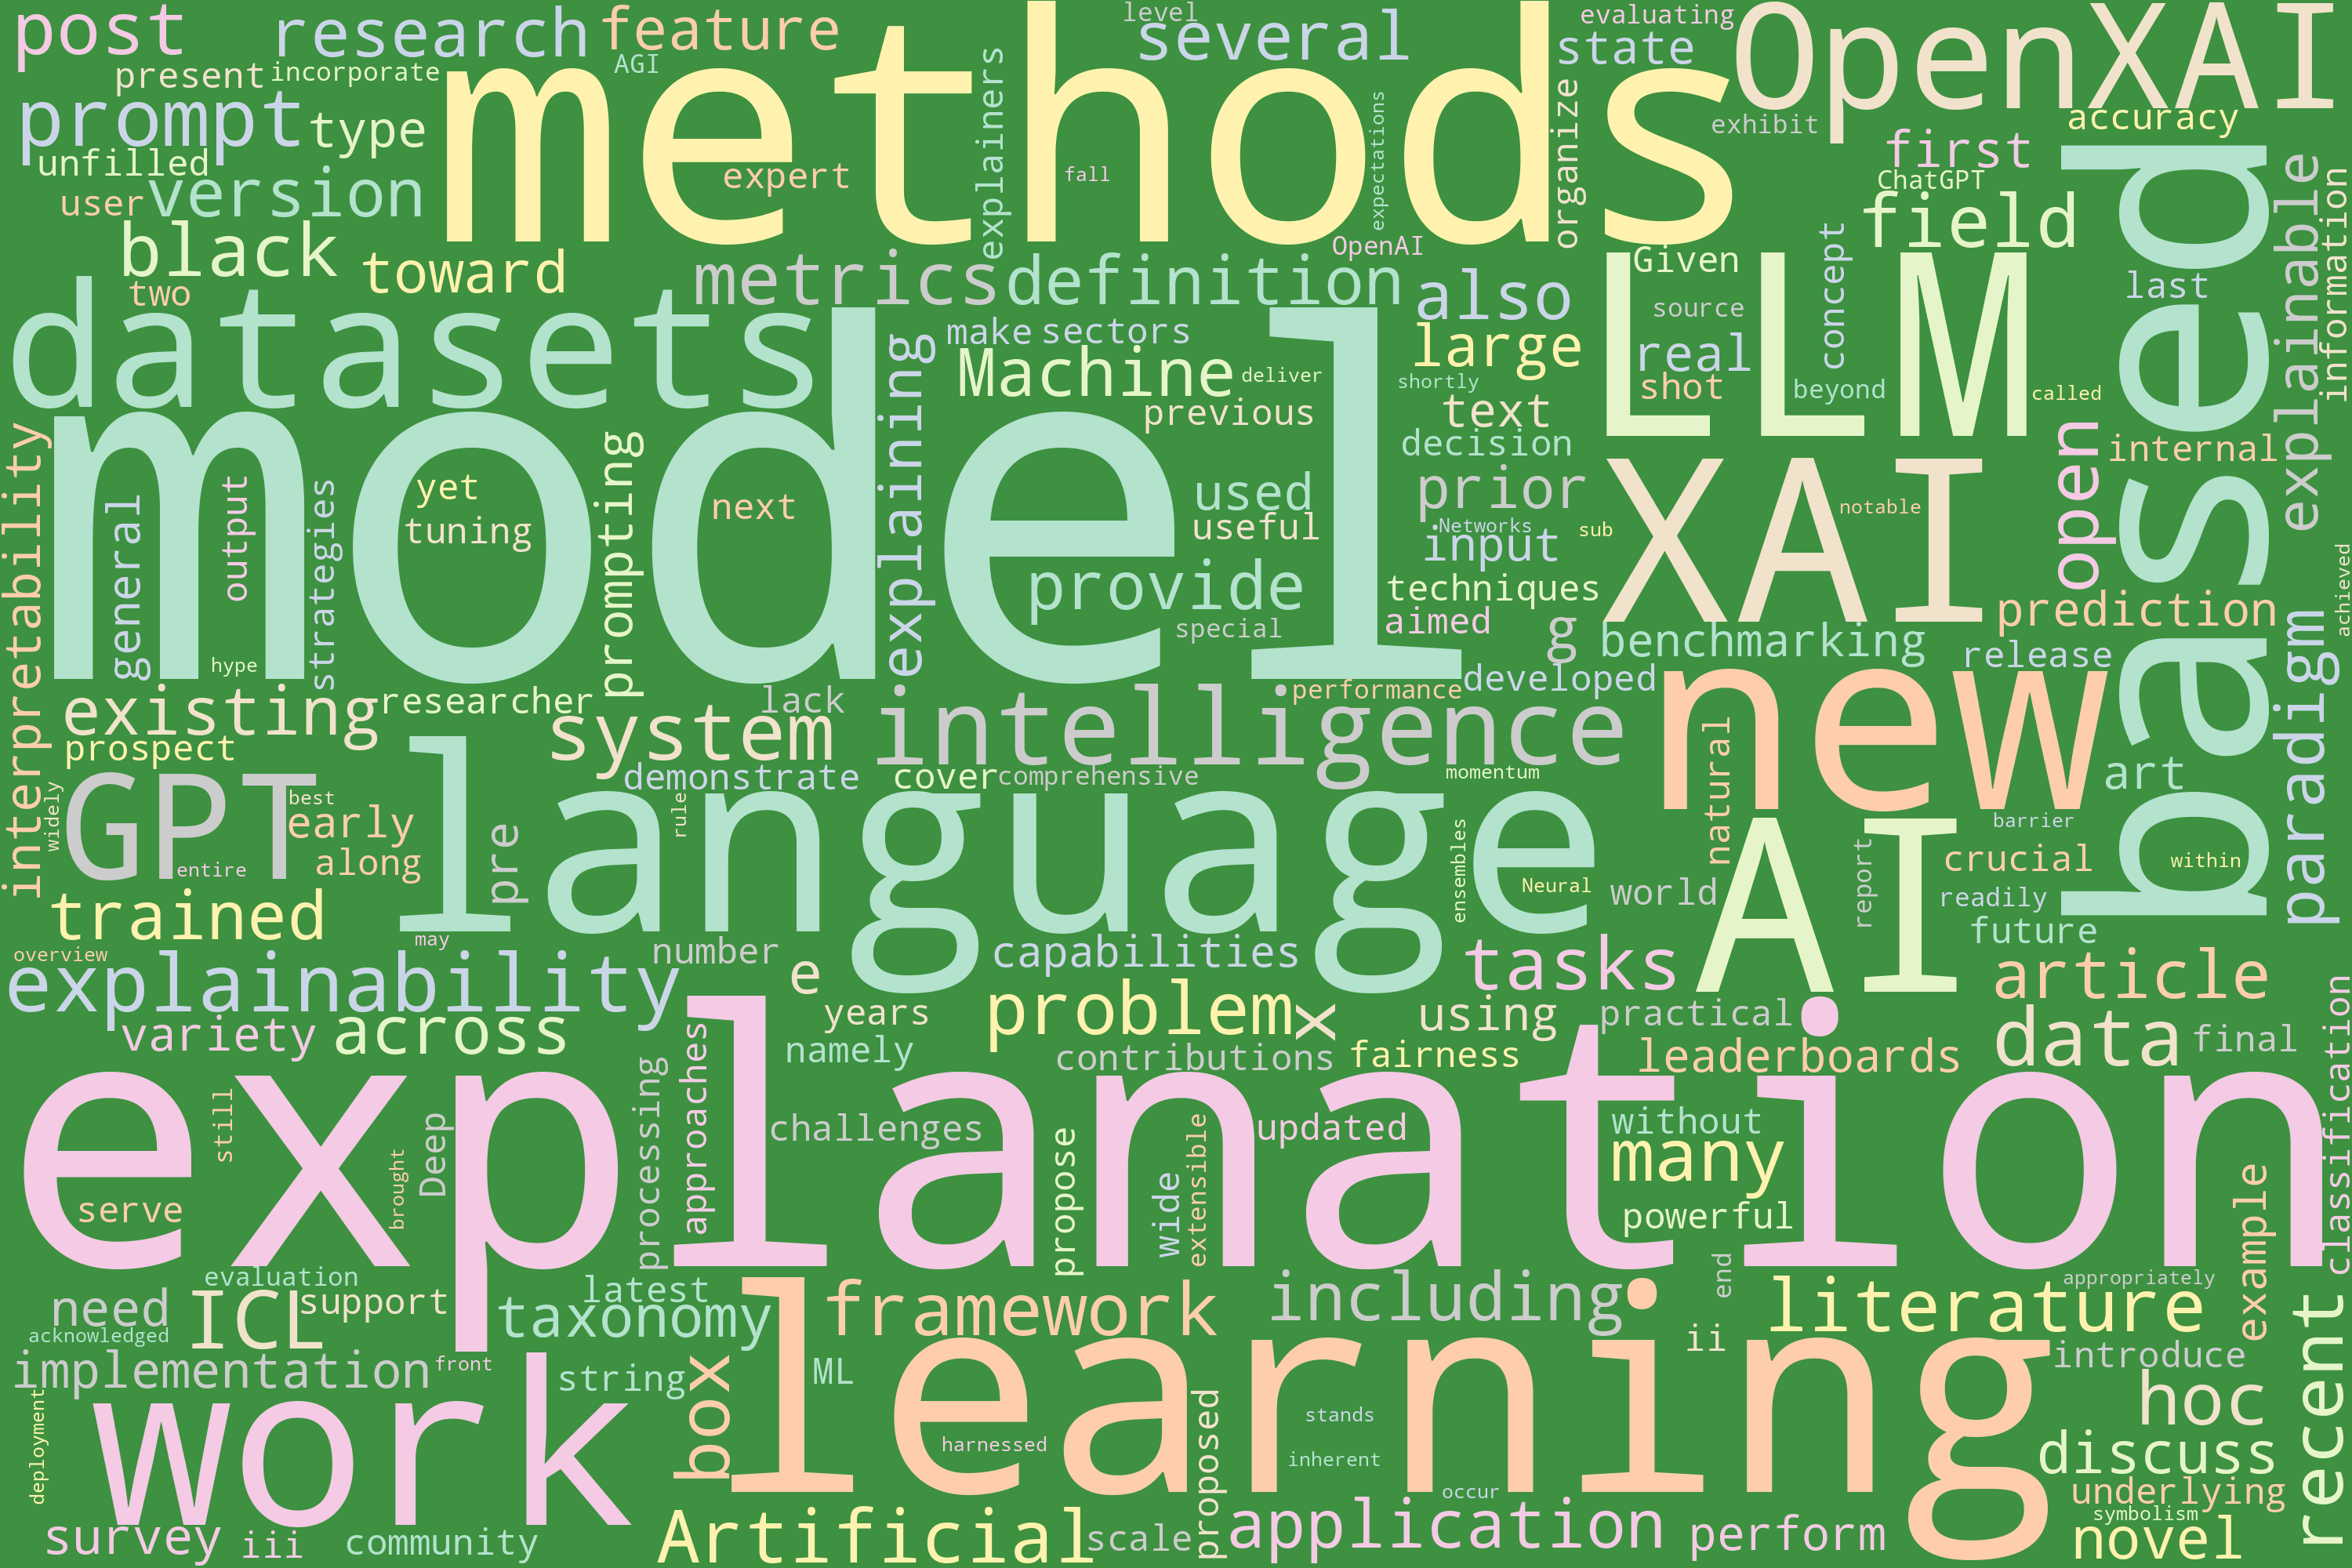

In [13]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

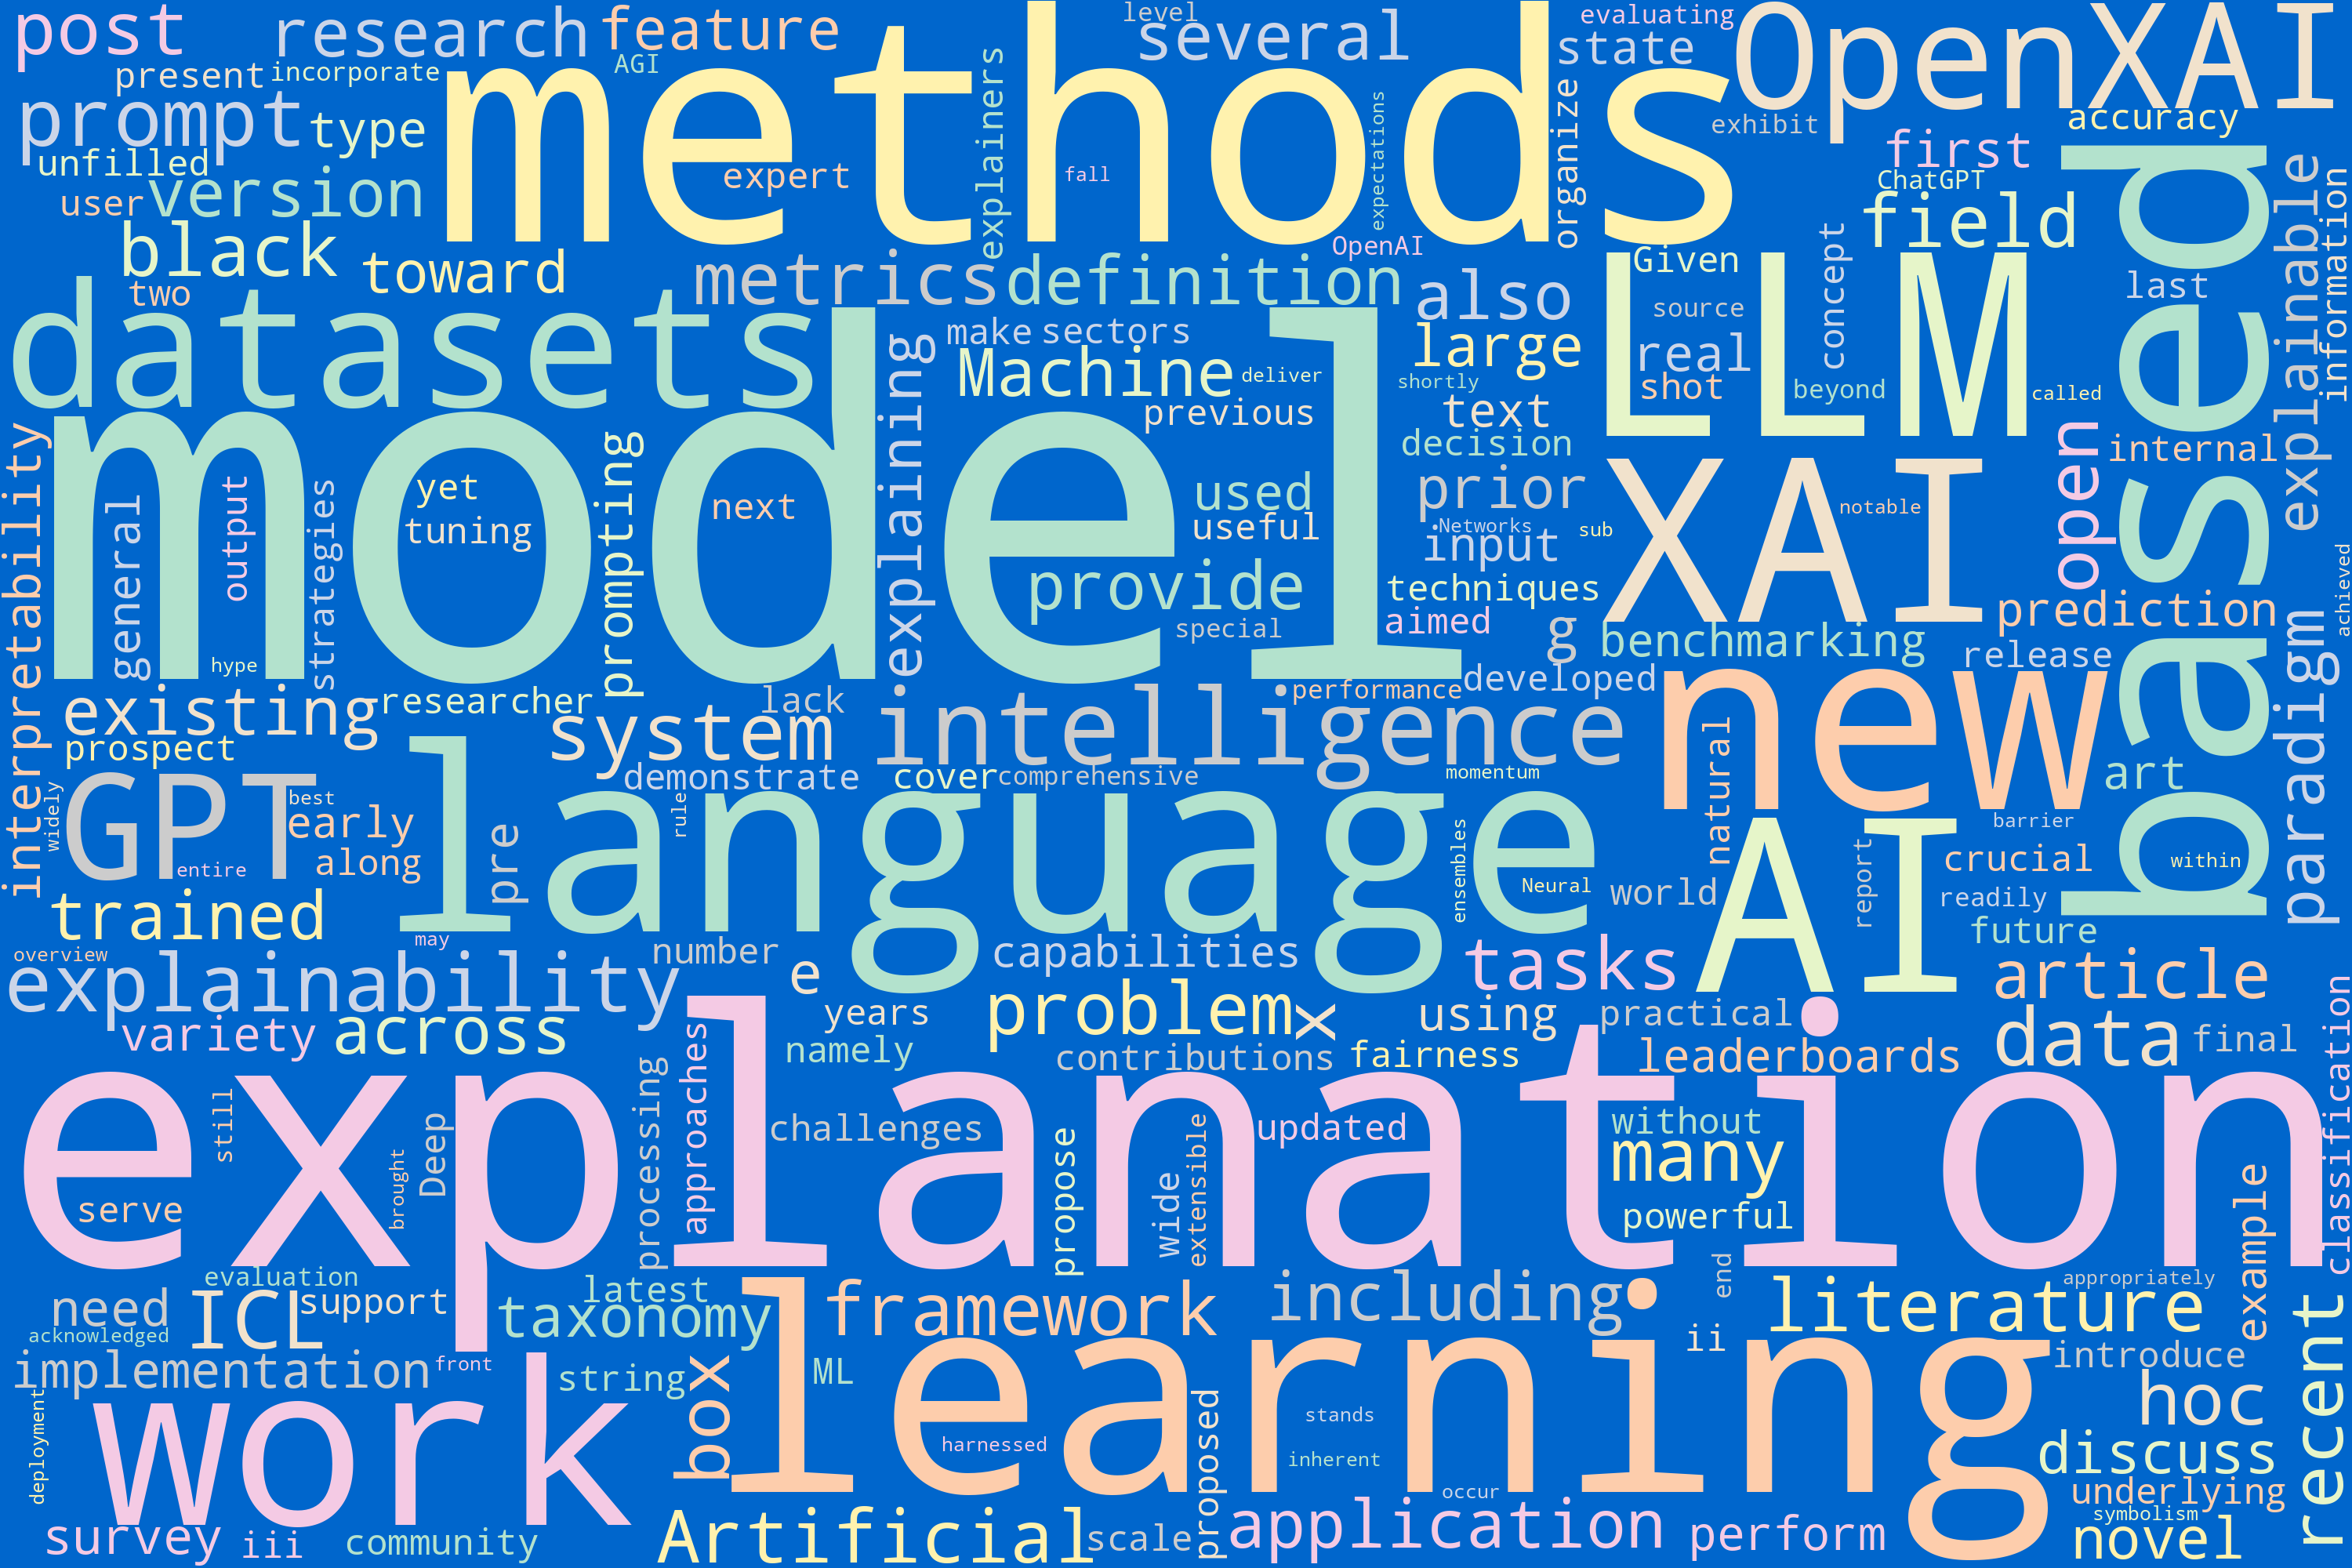

In [14]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [15]:
df.columns

Index(['Title', 'Abstract'], dtype='object')

In [16]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
df_Title  = df['Title'].str.lower()

In [18]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'explainable artificial intelligence  xai   concepts, taxonomies, opportunities and challenges toward responsible ai  survey of methods for explaining black box models  are large language models post hoc explainers   pre-train, prompt, and predict  systematic survey of prompting methods in natural language processing  openxai  towards transparent evaluation of model explanations  sparks of artificial general intelligence  early experiments with gpt-'

In [19]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [20]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [21]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['explainable',
 'artificial',
 'intelligence',
 'xai',
 'concepts,',
 'taxonomies,',
 'opportunity',
 'and',
 'challenge',
 'toward',
 'responsible',
 'ai',
 'survey',
 'of',
 'method',
 'for',
 'explaining',
 'black',
 'box',
 'model',
 'are',
 'large',
 'language',
 'model',
 'post',
 'hoc',
 'explainers',
 'pre-train,',
 'prompt,',
 'and',
 'predict',
 'systematic',
 'survey',
 'of',
 'prompting',
 'method',
 'in',
 'natural',
 'language',
 'processing',
 'openxai',
 'towards',
 'transparent',
 'evaluation',
 'of',
 'model',
 'explanation',
 'spark',
 'of',
 'artificial',
 'general',
 'intelligence',
 'early',
 'experiment',
 'with',
 'gpt-']

In [24]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['explainable',
 'artificial',
 'intelligence',
 'xai',
 'concepts,',
 'taxonomies,',
 'opportunity',
 'challenge',
 'toward',
 'responsible',
 'ai',
 'method',
 'explaining',
 'black',
 'box',
 'model',
 'large',
 'language',
 'model',
 'post',
 'hoc',
 'explainers',
 'pre-train,',
 'prompt,',
 'predict',
 'systematic',
 'prompting',
 'method',
 'natural',
 'language',
 'processing',
 'openxai',
 'towards',
 'transparent',
 'evaluation',
 'model',
 'explanation',
 'spark',
 'artificial',
 'general',
 'intelligence',
 'early',
 'experiment',
 'gpt-']

In [25]:
import collections

In [26]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [27]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0   (explainable, artificial)       1
32     (towards, transparent)       1
24      (predict, systematic)       1
25    (systematic, prompting)       1
26        (prompting, method)       1
27          (method, natural)       1
28        (natural, language)       1
29     (language, processing)       1
30      (processing, openxai)       1
31         (openxai, towards)       1
33  (transparent, evaluation)       1
22      (pre-train,, prompt,)       1
34        (evaluation, model)       1
35       (model, explanation)       1
36       (explanation, spark)       1
37        (spark, artificial)       1
38      (artificial, general)       1
39    (general, intelligence)       1
40      (intelligence, early)       1
41        (early, experiment)       1

In [28]:
print(title_bigram.head(25).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
 (explainable, artificial) &       1 \\
    (towards, transparent) &       1 \\
     (predict, systematic) &       1 \\
   (systematic, prompting) &       1 \\
       (prompting, method) &       1 \\
         (method, natural) &       1 \\
       (natural, language) &       1 \\
    (language, processing) &       1 \\
     (processing, openxai) &       1 \\
        (openxai, towards) &       1 \\
 (transparent, evaluation) &       1 \\
     (pre-train,, prompt,) &       1 \\
       (evaluation, model) &       1 \\
      (model, explanation) &       1 \\
      (explanation, spark) &       1 \\
       (spark, artificial) &       1 \\
     (artificial, general) &       1 \\
   (general, intelligence) &       1 \\
     (intelligence, early) &       1 \\
       (early, experiment) &       1 \\
        (prompt,, predict) &       1 \\
  (explainers, pre-train,) &       1 \\
(artificial, intelligence) &       1 \\
  

<ipython-input-28-d48c86c5ce71>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(title_bigram.head(25).to_latex(index=False))


In [29]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('explainable', 'artificial')  |        1 |
| ('towards', 'transparent')     |        1 |
| ('predict', 'systematic')      |        1 |
| ('systematic', 'prompting')    |        1 |
| ('prompting', 'method')        |        1 |
| ('method', 'natural')          |        1 |
| ('natural', 'language')        |        1 |
| ('language', 'processing')     |        1 |
| ('processing', 'openxai')      |        1 |
| ('openxai', 'towards')         |        1 |
| ('transparent', 'evaluation')  |        1 |
| ('pre-train,', 'prompt,')      |        1 |
| ('evaluation', 'model')        |        1 |
| ('model', 'explanation')       |        1 |
| ('explanation', 'spark')       |        1 |
| ('spark', 'artificial')        |        1 |
| ('artificial', 'general')      |        1 |
| ('general', 'intelligence')    |        1 |
| ('intelligence', 'early')      |        1 |
| ('early', 'experiment')        |

In [30]:
title_bigram.to_csv("title_bigram.csv")

In [31]:
import networkx as nx

In [32]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

In [33]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [34]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

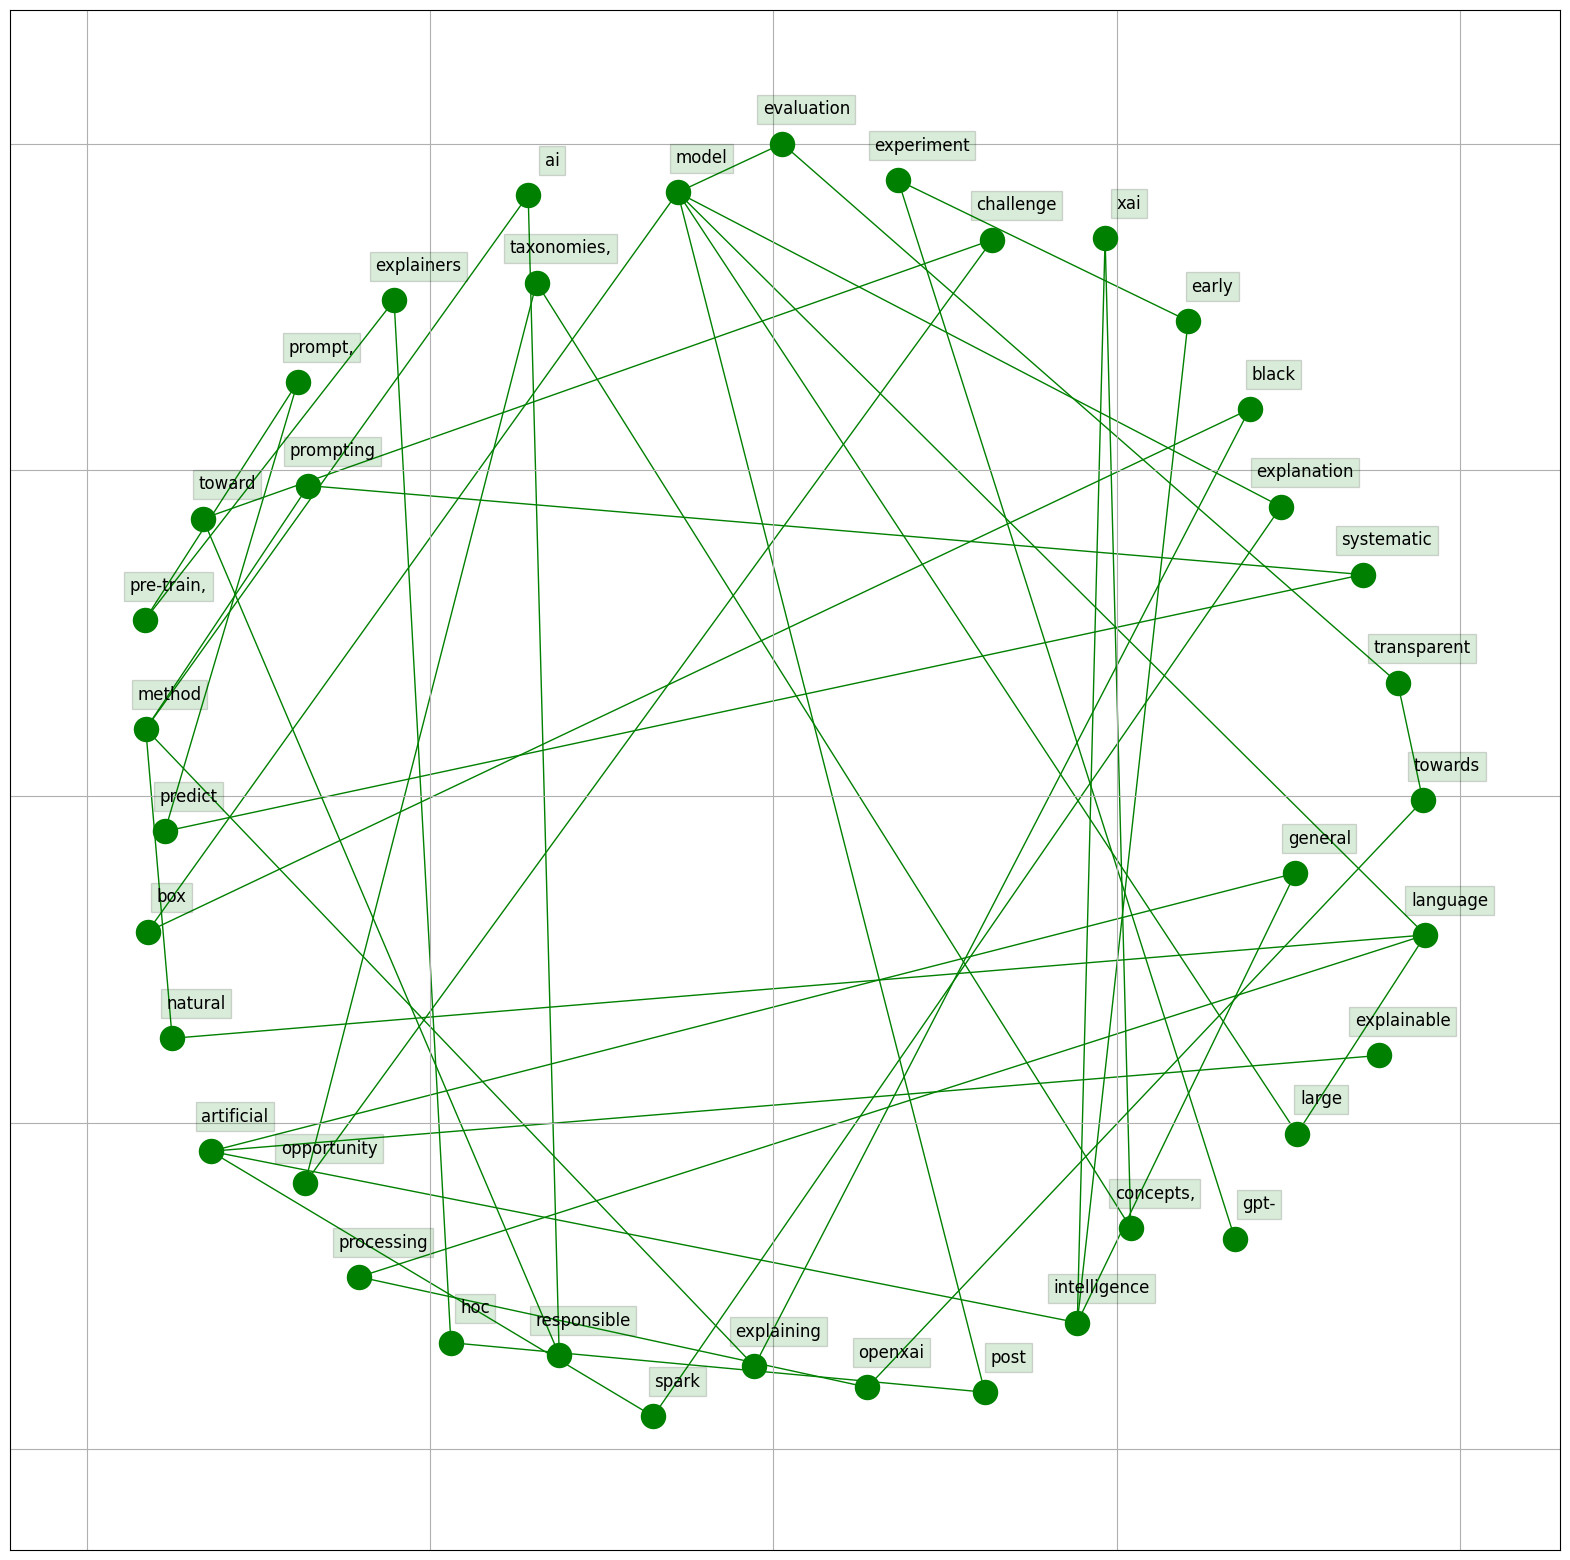

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [36]:
import igviz as ig

In [37]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [38]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-38-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [39]:
df_Abstract = df['Abstract'].str.lower()

In [40]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"in the last few years  artificial intelligence  ai  has achieved notable momentum that  if harnessed appropriately  may deliver the best of expectations over many application sectors across the field  for this to occur shortly in machine learning  the entire community stands in front of the barrier of explainability  an inherent problem of the latest techniques brought by sub-symbolism  e g  ensembles or deep neural networks  that were not present in the last hype of ai  namely  expert systems and rule based models   paradigms underlying this problem fall within the so-called explainable ai  xai  field  which is widely acknowledged as crucial feature for the practical deployment of ai models  the overview presented in this article examines the existing literature and contributions already done in the field of xai  including prospect toward what is yet to be reached  for this purpose we summarize previous efforts made to define explainability in machine learning  establishing novel def

In [41]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [42]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [43]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['in',
 'the',
 'last',
 'few',
 'year',
 'artificial',
 'intelligence',
 'ai',
 'ha',
 'achieved',
 'notable',
 'momentum',
 'that',
 'if',
 'harnessed',
 'appropriately',
 'may',
 'deliver',
 'the',
 'best',
 'of',
 'expectation',
 'over',
 'many',
 'application',
 'sector',
 'across',
 'the',
 'field',
 'for',
 'this',
 'to',
 'occur',
 'shortly',
 'in',
 'machine',
 'learning',
 'the',
 'entire',
 'community',
 'stand',
 'in',
 'front',
 'of',
 'the',
 'barrier',
 'of',
 'explainability',
 'an',
 'inherent',
 'problem',
 'of',
 'the',
 'latest',
 'technique',
 'brought',
 'by',
 'sub-symbolism',
 'e',
 'g',
 'ensemble',
 'or',
 'deep',
 'neural',
 'network',
 'that',
 'were',
 'not',
 'present',
 'in',
 'the',
 'last',
 'hype',
 'of',
 'ai',
 'namely',
 'expert',
 'system',
 'and',
 'rule',
 'based',
 'model',
 'paradigm',
 'underlying',
 'this',
 'problem',
 'fall',
 'within',
 'the',
 'so-called',
 'explainable',
 'ai',
 'xai',
 'field',
 'which',
 'is',
 'widely',
 'acknowledged

In [45]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['last',
 'year',
 'artificial',
 'intelligence',
 'ai',
 'achieved',
 'notable',
 'momentum',
 'harnessed',
 'appropriately',
 'may',
 'deliver',
 'best',
 'expectation',
 'many',
 'application',
 'sector',
 'across',
 'field',
 'occur',
 'shortly',
 'machine',
 'learning',
 'entire',
 'community',
 'stand',
 'front',
 'barrier',
 'explainability',
 'inherent',
 'problem',
 'latest',
 'technique',
 'brought',
 'sub-symbolism',
 'ensemble',
 'deep',
 'neural',
 'network',
 'present',
 'last',
 'hype',
 'ai',
 'namely',
 'expert',
 'system',
 'rule',
 'based',
 'model',
 'paradigm',
 'underlying',
 'problem',
 'fall',
 'within',
 'so-called',
 'explainable',
 'ai',
 'xai',
 'field',
 'widely',
 'acknowledged',
 'crucial',
 'feature',
 'practical',
 'deployment',
 'ai',
 'model',
 'overview',
 'presented',
 'article',
 'examines',
 'existing',
 'literature',
 'contribution',
 'already',
 'done',
 'field',
 'xai',
 'including',
 'prospect',
 'toward',
 'yet',
 'reached',
 'purpose',
 'sum

In [46]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [47]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0        (explanation, method)       9
1            (language, model)       6
2                 (black, box)       5
3                  (post, hoc)       5
4   (artificial, intelligence)       4
5          (machine, learning)       4
6             (existing, work)       3
7           (hoc, explanation)       3
16      (language, processing)       2
23     (general, intelligence)       2
22            (early, version)       2
21      (benchmarking, method)       2
19             (new, paradigm)       2
18                 (ml, model)       2
17           (hoc, explainers)       2
20             (wide, variety)       2
15         (natural, language)       2
13           (large, language)       2
12               (box, system)       2
11          (future, research)       2
10                (field, xai)       2
9                  (ai, model)       2
14                (model, llm)       2
8           (intelligence, ai)       2
72             (problem, fall)       1

In [48]:
print(abstract_bigram.head(90).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
     (explanation, method) &       9 \\
         (language, model) &       6 \\
              (black, box) &       5 \\
               (post, hoc) &       5 \\
(artificial, intelligence) &       4 \\
       (machine, learning) &       4 \\
          (existing, work) &       3 \\
        (hoc, explanation) &       3 \\
    (language, processing) &       2 \\
   (general, intelligence) &       2 \\
          (early, version) &       2 \\
    (benchmarking, method) &       2 \\
           (new, paradigm) &       2 \\
               (ml, model) &       2 \\
         (hoc, explainers) &       2 \\
           (wide, variety) &       2 \\
       (natural, language) &       2 \\
         (large, language) &       2 \\
             (box, system) &       2 \\
        (future, research) &       2 \\
              (field, xai) &       2 \\
               (ai, model) &       2 \\
              (model, llm) &       2 \\
  

<ipython-input-48-84cfb0cbda73>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [49]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('explanation', 'method')      |        9 |
| ('language', 'model')          |        6 |
| ('black', 'box')               |        5 |
| ('post', 'hoc')                |        5 |
| ('artificial', 'intelligence') |        4 |
| ('machine', 'learning')        |        4 |
| ('existing', 'work')           |        3 |
| ('hoc', 'explanation')         |        3 |
| ('language', 'processing')     |        2 |
| ('general', 'intelligence')    |        2 |
| ('early', 'version')           |        2 |
| ('benchmarking', 'method')     |        2 |
| ('new', 'paradigm')            |        2 |
| ('ml', 'model')                |        2 |
| ('hoc', 'explainers')          |        2 |
| ('wide', 'variety')            |        2 |
| ('natural', 'language')        |        2 |
| ('large', 'language')          |        2 |
| ('box', 'system')              |        2 |
| ('future', 'research')         |

In [50]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [51]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [52]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count/10)

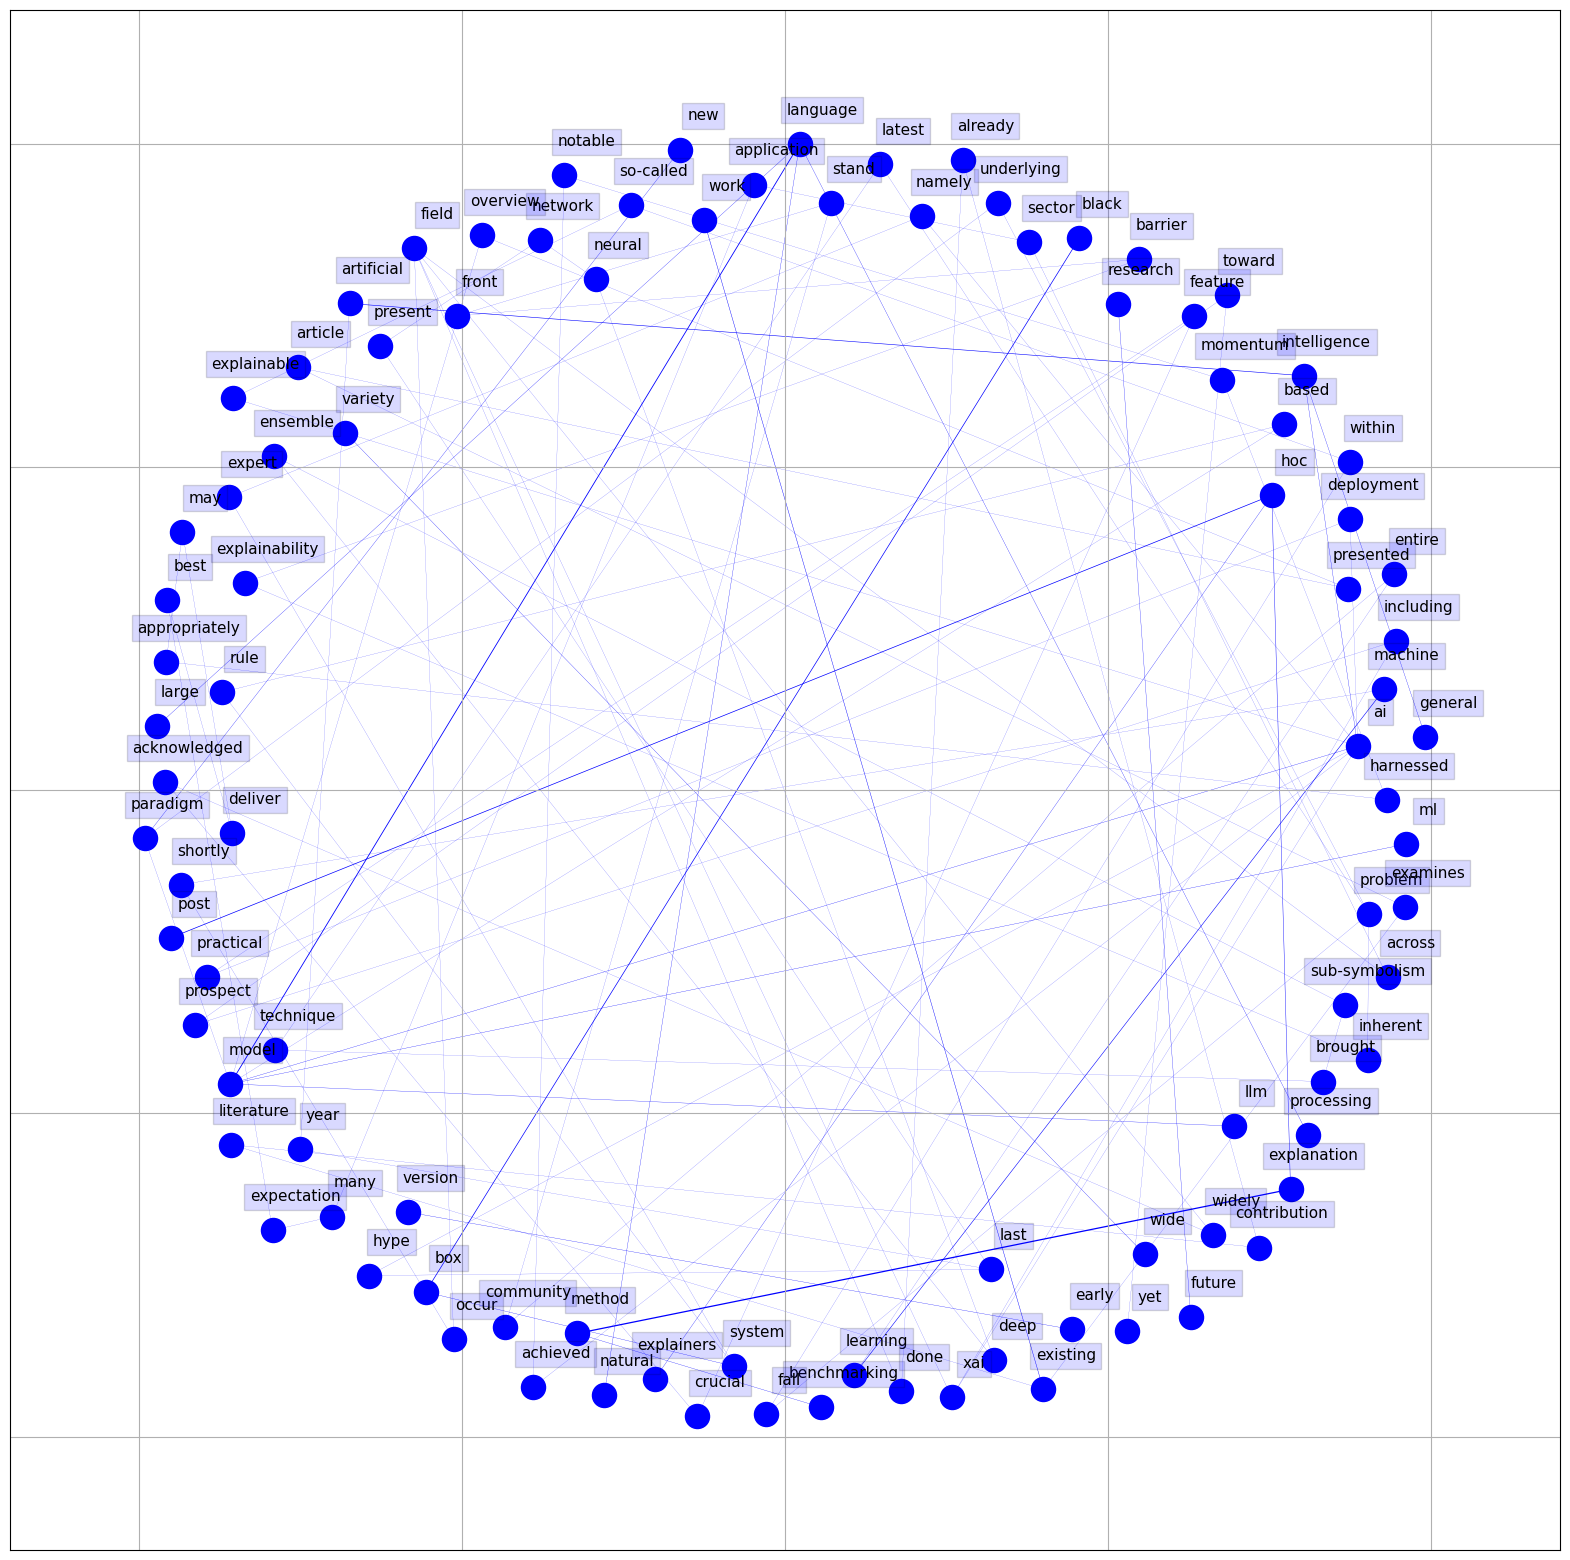

In [53]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)

plt.show()

In [54]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [55]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-55-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

